In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cri_df= pd.read_csv("Boller_All.csv")
cri_df.shape

(96, 17)

In [3]:
cri_df.head(2)

,Player,Span,Mat,Inns,Overs,Mdns,Runs,Wkts,Ave,Econ,SR,4,5,Ct,St,rat,res
0,Abdur Razzak,2004-2014,153,152,1327.3,70,6065,207,29.29,4.56,38.4,5,4,32,0,41.350027,1
1,Abul Hasan,2012-2018,7,7,36.0,1,244,0,0.00,6.77,0.0,0,0,1,0,34.884921,0


In [4]:
cri_df.count()

Player    96
Span      95
Mat       96
Inns      96
Overs     96
Mdns      96
Runs      96
Wkts      96
Ave       96
Econ      96
SR        96
4         96
5         96
Ct        96
St        96
rat       96
res       96
dtype: int64

In [5]:
cri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  96 non-null     object 
 1   Span    95 non-null     object 
 2   Mat     96 non-null     int64  
 3   Inns    96 non-null     int64  
 4   Overs   96 non-null     float64
 5   Mdns    96 non-null     int64  
 6   Runs    96 non-null     int64  
 7   Wkts    96 non-null     int64  
 8   Ave     96 non-null     float64
 9   Econ    96 non-null     float64
 10  SR      96 non-null     float64
 11  4       96 non-null     int64  
 12  5       96 non-null     int64  
 13  Ct      96 non-null     int64  
 14  St      96 non-null     int64  
 15  rat     96 non-null     float64
 16  res     96 non-null     int64  
dtypes: float64(5), int64(10), object(2)
memory usage: 12.9+ KB


In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = cri_df.iloc[:,2:16]  #independent columns
y = cri_df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

plt.show()

    Specs         Score
4    Runs  37973.885712
2   Overs   7790.576797
5    Wkts   1316.766618
3    Mdns    610.963140
1    Inns    579.965176
13    rat    288.536305
9       4     58.720522
6     Ave     51.114648
0     Mat     33.850777
8      SR     31.694685


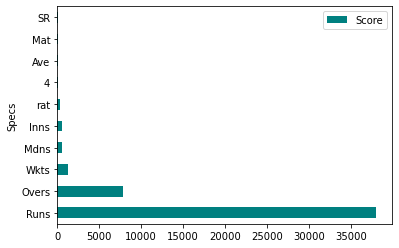

In [7]:
f = featureScores.nlargest(10,'Score')
f.plot(x= 'Specs', y = 'Score', kind='barh', color ='teal')
#featureScores.plot(kind='barh', nlargest(10),color ='teal')
plt.show()

In [9]:
cri_df.columns
feature_df = cri_df[['Overs','Runs', 'Mdns', 'Wkts', 'Inns', 'rat','Econ', 'Mat','Ave']]

X = np.asarray(feature_df)
y = np.asarray(cri_df['res'])


y[0:15]

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
X_test.shape

(29, 9)

In [11]:
from sklearn import svm

classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C = 2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

print('Accuracy score: ',accuracy_score(y_test, y_predict))

Accuracy score:  0.9310344827586207


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.88      0.94        17

    accuracy                           0.93        29
   macro avg       0.93      0.94      0.93        29
weighted avg       0.94      0.93      0.93        29



In [15]:
k = cri_df.sort_values(by='rat', ascending = False)

In [16]:
s = k.head(10)

In [17]:
k = s.Player
k.head(10)

3               Abu Jayed
40          Mahbubul Alam
53        Mohammad Sharif
90           Taskin Ahmed
2               Abu Hider
81           Subashis Roy
59      Mustafizur Rahman
64           Nazmul Islam
52     Mohammad Saifuddin
13    Anwar Hossain Monir
Name: Player, dtype: object